## **Práctica 9: Clustering Jerárquico y Particional**

Nombre: Lopez Muñoz Jose Luis 

No. Cuenta: 315048391

Email: joselopezm9809@gmail.com

**Contexto**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

**Objetivo.** Obtener grupos de pacientes con características similares, diagnosticadas con un tumor de mama, a través de clustering jerárquico y particional.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

- ID number: Identifica al paciente -Discreto-
- Diagnosis: Diagnostico (M=maligno, B=benigno) -Booleano-
- Radius: Media de las distancias del centro y puntos del perímetro -Continuo-
- Texture: Desviación estándar de la escala de grises -Continuo-
- Perimeter: Valor del perímetro del cáncer de mama -Continuo-
- Area: Valor del área del cáncer de mama -Continuo-
- Smoothness: Variación de la longitud del radio -Continuo-
- Compactness: Perímetro ^ 2 /Area - 1 -Continuo-
- Concavity: Caída o gravedad de las curvas de nivel -Continuo-
- Concave points: Número de sectores de contorno cóncavo -Continuo-
- Symmetry: Simetría de la imagen -Continuo-
- Fractal dimension: “Aproximación de frontera” - 1 -Continuo-

#### **1) Importar las bibliotecas necesarias y los datos**

In [9]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [10]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [11]:
BCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDNumber          569 non-null    object 
 1   Diagnosis         569 non-null    object 
 2   Radius            569 non-null    float64
 3   Texture           569 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        569 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         569 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  569 non-null    float64
dtypes: float64(10), object(2)
memory usage: 53.5+ KB


In [12]:
print(BCancer.groupby('Diagnosis').size())

Diagnosis
B    357
M    212
dtype: int64


#### **2) Selección de características**

 **Evaluación visual**

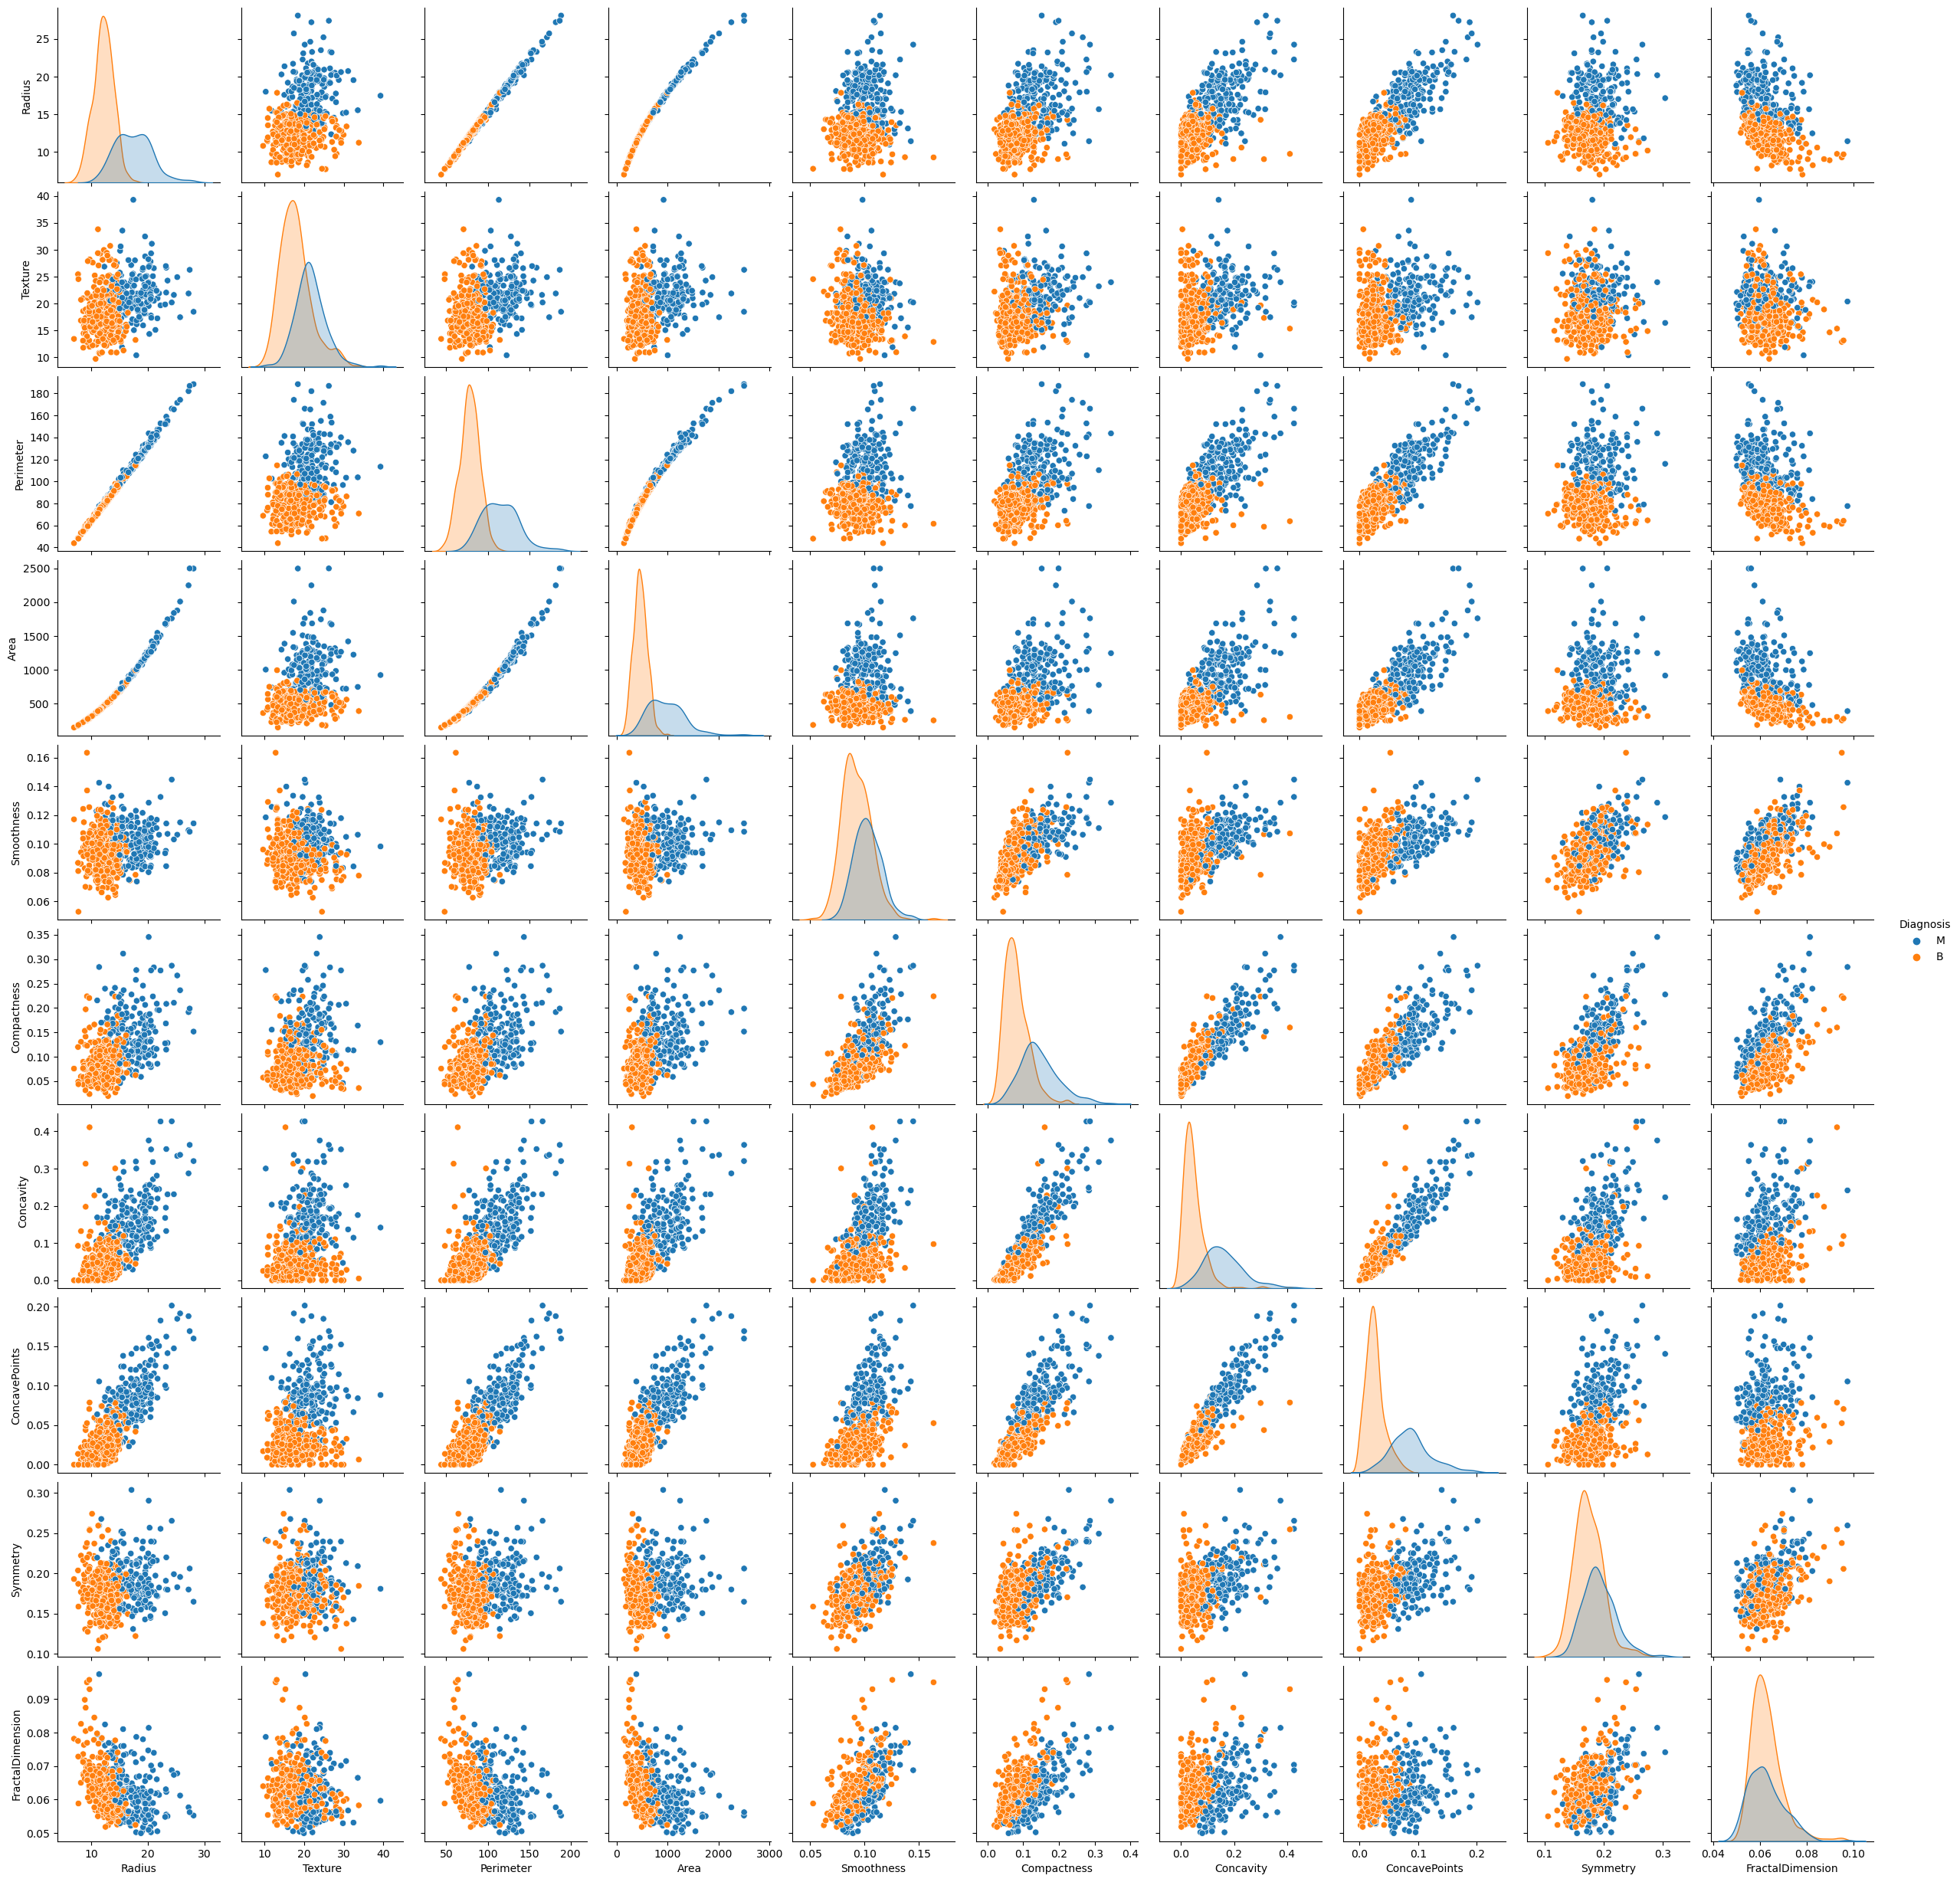

In [13]:
sns.pairplot(BCancer, hue='Diagnosis')
plt.show()

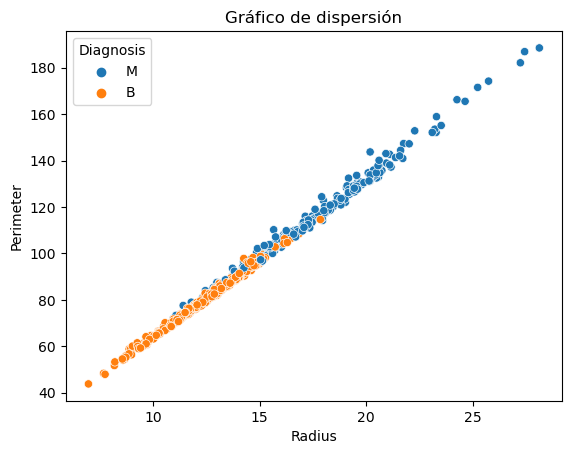

In [14]:
sns.scatterplot(x='Radius', y ='Perimeter', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()

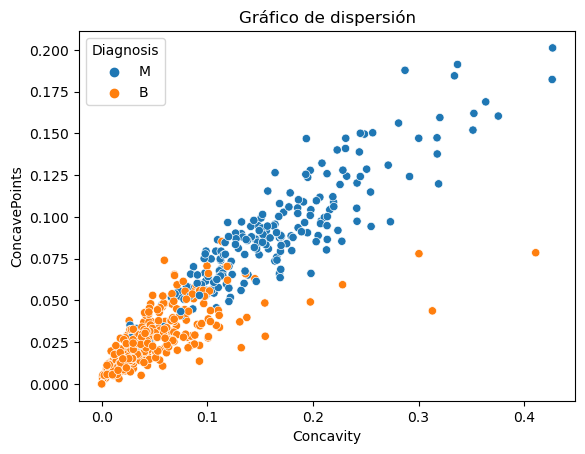

In [15]:
sns.scatterplot(x='Concavity', y ='ConcavePoints', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Concavity')
plt.ylabel('ConcavePoints')
plt.show()

In [16]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer 

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [17]:
print(CorrBCancer['Radius'].sort_values(ascending=False)[:10], '\n')   # se muestra el top 10 de los valores

Radius              1.000000
Perimeter           0.997855
Area                0.987357
ConcavePoints       0.822529
Concavity           0.676764
Compactness         0.506124
Texture             0.323782
Smoothness          0.170581
Symmetry            0.147741
FractalDimension   -0.311631
Name: Radius, dtype: float64 



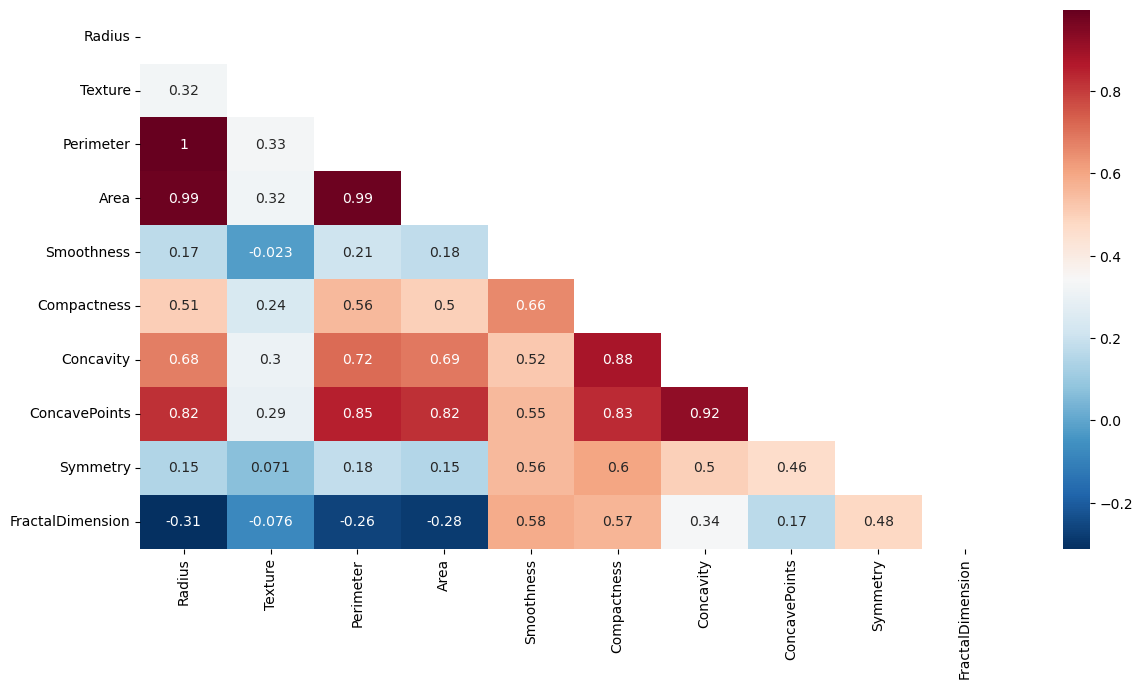

In [18]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrBCancer)
sns.heatmap(CorrBCancer, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [19]:
MatrizVariables = np.array(BCancer[['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension']])
pd.DataFrame(MatrizVariables)
#MatrizVariables = BCancer.iloc[:, [3, 5, 6, 7, 10, 11]].values  #iloc para seleccionar filas y columnas

,0,1,2,3,4,5
0,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,29.33,1265.0,0.11780,0.27700,0.2397,0.07016


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                                # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(MatrizVariables)   # Se escalan los datos
pd.DataFrame(MEstandarizada) 

,0,1,2,3,4,5
0,-2.073335,0.984375,1.568466,3.283515,2.217515,2.255747
1,-0.353632,1.908708,-0.826962,-0.487072,0.001392,-0.868652
2,0.456187,1.558884,0.942210,1.052926,0.939685,-0.398008
3,0.253732,-0.764464,3.283553,3.402909,2.867383,4.910919
4,-1.151816,1.826229,0.280372,0.539340,-0.009560,-0.562450
...,...,...,...,...,...,...
564,0.721473,2.343856,1.041842,0.219060,-0.312589,-0.931027
565,2.085134,1.723842,0.102458,-0.017833,-0.217664,-1.058611
566,2.045574,0.577953,-0.840484,-0.038680,-0.809117,-0.895587
567,2.336457,1.735218,1.525767,3.272144,2.137194,1.043695


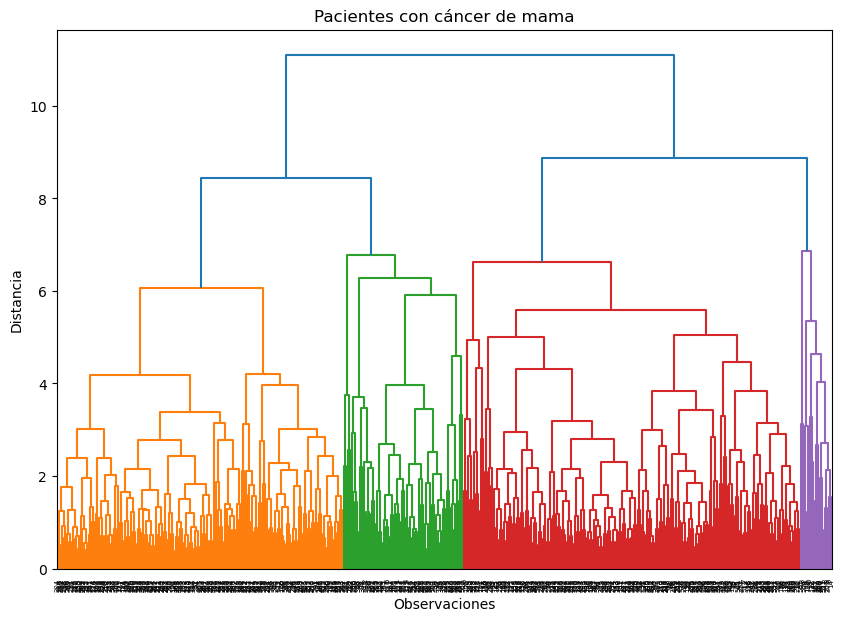

In [24]:
#Se importan las bibliotecas de clustering jerárquico para crear el árbol
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10, 7))
plt.title("Pacientes con cáncer de mama")
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
Arbol = shc.dendrogram(shc.linkage(MEstandarizada, method='complete', metric='euclidean'))

In [26]:
#Se crean las etiquetas de los elementos en los clusters
MJerarquico = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='euclidean')
MJerarquico.fit_predict(MEstandarizada)
MJerarquico.labels_

array([0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 3, 2, 1, 3, 0, 2, 3, 2, 1, 2, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2,
       2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 0, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 0, 2, 3, 3, 3, 1, 2, 1, 2, 2,
       2, 2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 1, 3, 3, 2, 1, 2, 3, 1, 3, 3, 1, 1, 2, 2, 3, 2, 2, 3, 3,
       2, 2, 3, 3, 1, 0, 1, 3, 3, 3, 1, 2, 2, 3, 0, 3, 3, 2, 2, 3, 2, 1,
       1, 2, 2, 1, 1, 0, 3, 3, 2, 1, 2, 3, 1, 3, 1, 1, 2, 2, 3, 3, 2, 1,
       3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2, 3,
       2, 3, 2, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 2, 1, 0, 0, 1, 1, 3, 2, 3,
       2, 1, 3, 3, 2, 2, 3, 2, 1, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 1,

In [27]:
BCancer['clusterH'] = MJerarquico.labels_
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0


In [28]:
#Cantidad de elementos en los clusters
BCancer.groupby(['clusterH'])['clusterH'].count() 

clusterH
0     23
1     88
2    248
3    210
Name: clusterH, dtype: int64

In [29]:
BCancer[BCancer.clusterH == 0]

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH
0,P-842302,M,17.990,10.38,122.80,1001.0,0.1184,0.2776,0.30010,0.14710,0.2419,0.07871,0
3,P-84348301,M,11.420,20.38,77.58,386.1,0.1425,0.2839,0.24140,0.10520,0.2597,0.09744,0
8,P-844981,M,13.000,21.82,87.50,519.8,0.1273,0.1932,0.18590,0.09353,0.2350,0.07389,0
9,P-84501001,M,12.460,24.04,83.97,475.9,0.1186,0.2396,0.22730,0.08543,0.2030,0.08243,0
14,P-84667401,M,13.730,22.61,93.60,578.3,0.1131,0.2293,0.21280,0.08025,0.2069,0.07682,0
22,P-8511133,M,15.340,14.26,102.50,704.4,0.1073,0.2135,0.20770,0.09756,0.2521,0.07032,0
25,P-852631,M,17.140,16.40,116.00,912.7,0.1186,0.2276,0.22290,0.14010,0.3040,0.07413,0
78,P-8610862,M,20.180,23.97,143.70,1245.0,0.1286,0.3454,0.37540,0.16040,0.2906,0.08142,0
108,P-86355,M,22.270,19.67,152.80,1509.0,0.1326,0.2768,0.42640,0.18230,0.2556,0.07039,0
122,P-865423,M,24.250,20.20,166.20,1761.0,0.1447,0.2867,0.42680,0.20120,0.2655,0.06877,0


In [30]:
CentroidesH = BCancer.groupby(['clusterH'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()
CentroidesH 

C:\Users\josel\AppData\Local\Temp\ipykernel_2856\2237771766.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CentroidesH = BCancer.groupby(['clusterH'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()


,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
clusterH,,,,,,
0,20.133478,775.543478,0.124274,0.242200,0.240830,0.077839
1,22.540568,1243.728409,0.098441,0.137140,0.182560,0.058889
2,18.167540,561.336694,0.103316,0.114235,0.190486,0.065737
3,19.160095,505.403810,0.084217,0.063813,0.163030,0.059317


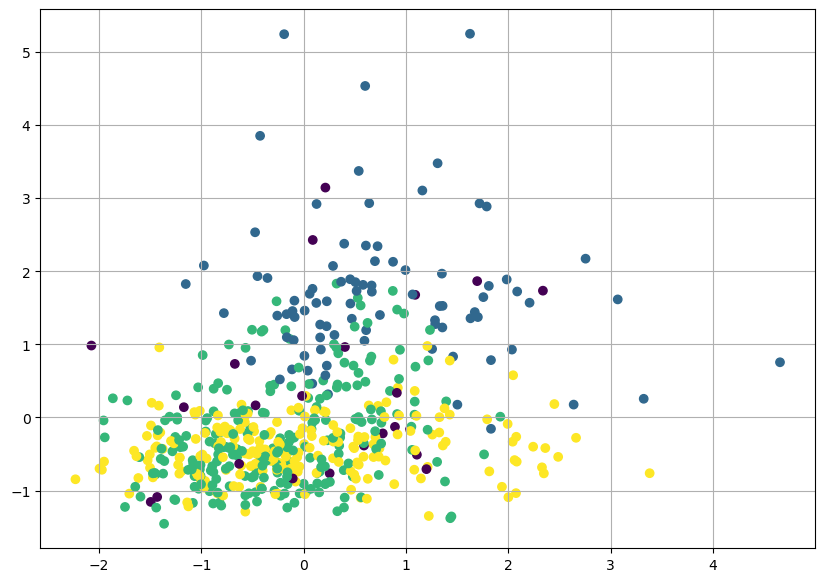

In [20]:
plt.figure(figsize=(10, 7))
plt.scatter(MEstandarizada[:,0], MEstandarizada[:,1], c=MJerarquico.labels_)
plt.grid()
plt.show()

In [21]:
#Se importan las bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

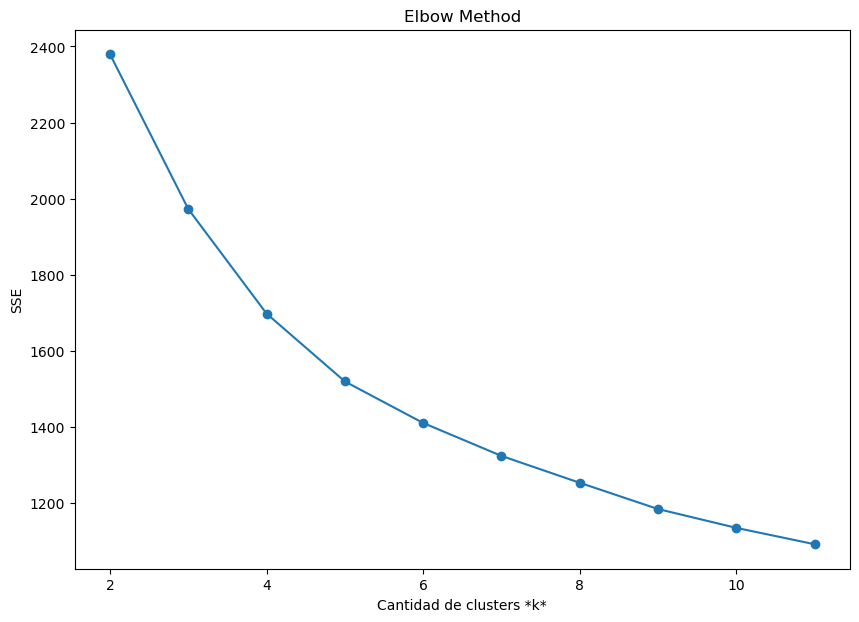

In [22]:
#Definición de k clusters para K-means
#Se utiliza random_state para inicializar el generador interno de números aleatorios
SSE = []
for i in range(2, 12):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(MEstandarizada)
    SSE.append(km.inertia_)

#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, 12), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [23]:
!pip install kneed

In [24]:
from kneed import KneeLocator
kl = KneeLocator(range(2, 12), SSE, curve="convex", direction="decreasing")
kl.elbow

5

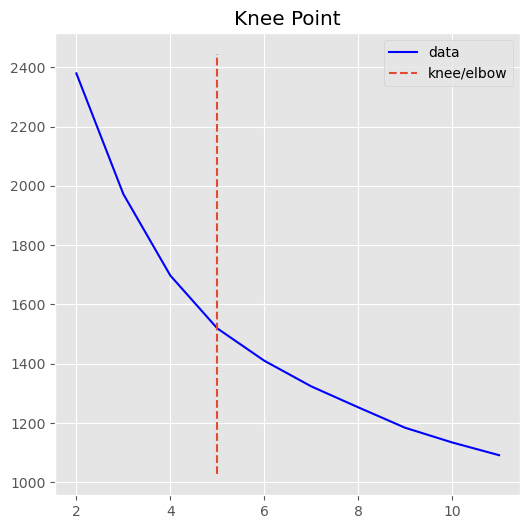

In [25]:
plt.style.use('ggplot')
kl.plot_knee()

In [26]:
#Se crean las etiquetas de los elementos en los clusters
MParticional = KMeans(n_clusters=5, random_state=0).fit(MEstandarizada)
MParticional.predict(MEstandarizada)
MParticional.labels_

array([1, 4, 4, 1, 4, 1, 4, 1, 1, 1, 0, 3, 1, 0, 1, 1, 2, 1, 4, 2, 3, 3,
       1, 4, 4, 1, 1, 4, 4, 3, 4, 1, 1, 4, 3, 4, 3, 2, 0, 3, 0, 3, 4, 3,
       0, 4, 2, 3, 2, 0, 0, 2, 2, 4, 0, 2, 4, 3, 2, 3, 3, 3, 1, 3, 3, 3,
       3, 2, 3, 2, 4, 3, 4, 3, 2, 2, 3, 1, 1, 2, 3, 3, 4, 4, 3, 4, 0, 4,
       0, 3, 0, 0, 2, 2, 3, 4, 3, 2, 2, 3, 0, 3, 2, 3, 3, 1, 3, 2, 1, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 1, 4, 2, 4, 1, 3, 2, 2, 0, 4, 3, 4, 3, 3,
       4, 2, 4, 0, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 2, 3, 3, 1, 2,
       2, 2, 4, 2, 2, 2, 3, 4, 4, 3, 4, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2,
       3, 4, 0, 2, 4, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 3, 3, 2, 3, 0,
       4, 3, 3, 4, 4, 1, 3, 2, 3, 4, 3, 2, 4, 2, 4, 0, 3, 3, 3, 2, 4, 0,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 1, 3, 0, 0, 4, 2, 0, 4, 4, 0, 0, 2, 2,
       3, 0, 4, 3, 2, 2, 0, 3, 4, 2, 4, 4, 4, 3, 4, 1, 1, 4, 4, 0, 4, 2,
       4, 4, 3, 0, 2, 3, 2, 2, 4, 2, 0, 3, 2, 2, 2, 2, 4, 2, 4, 3, 2, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 4,

In [27]:
BCancer['clusterP'] = MParticional.labels_
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0,1
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1,4
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1,4
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0,1
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1,4
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1,4
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3,0
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0,1


In [28]:
BCancer.groupby(['clusterP'])['clusterP'].count()

clusterP
0     85
1     48
2    184
3    153
4     99
Name: clusterP, dtype: int64

In [29]:
BCancer[BCancer.clusterP == 0]

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension,clusterH,clusterP
10,P-845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,3,0
13,P-846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,3,0
38,P-855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,3,0
40,P-855167,M,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,3,0
44,P-85638502,M,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,0.06177,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,P-925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,3,0
560,P-925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,1,0
561,P-925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,3,0
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,3,0


In [30]:
CentroidesP = BCancer.groupby(['clusterP'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()
CentroidesP

C:\Users\josel\AppData\Local\Temp\ipykernel_12612\2465084932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  CentroidesP = BCancer.groupby(['clusterP'])['Texture', 'Area', 'Smoothness', 'Compactness', 'Symmetry', 'FractalDimension'].mean()


,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
clusterP,,,,,,
0,24.492706,559.569412,0.085045,0.074626,0.164491,0.059430
1,20.746875,738.941667,0.117829,0.211744,0.229617,0.075797
2,16.339891,511.619022,0.086801,0.063990,0.165405,0.059257
3,17.822680,480.716993,0.105121,0.112265,0.190299,0.067212
4,21.865354,1231.431313,0.099894,0.140528,0.187147,0.059145


C:\Users\josel\AppData\Local\Temp\ipykernel_12612\586287544.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


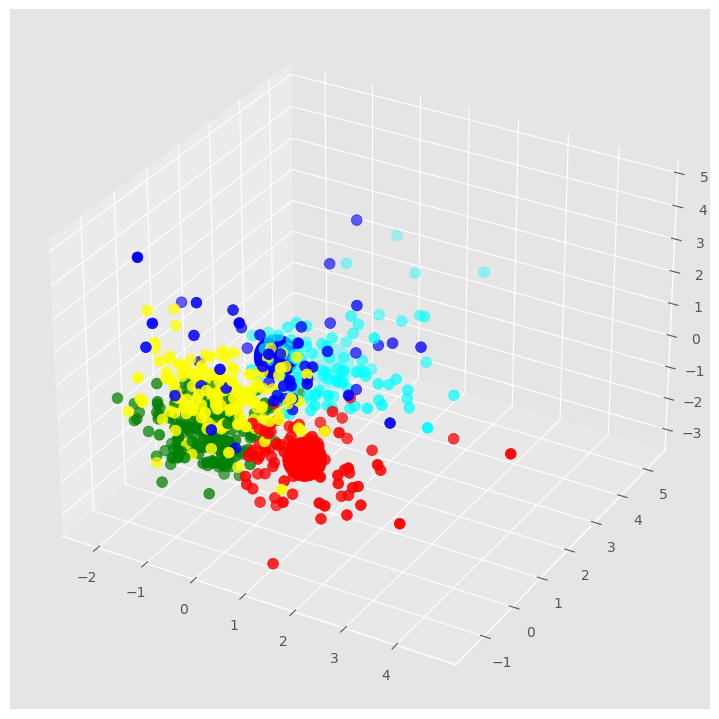

In [31]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'green', 'yellow', 'cyan']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MEstandarizada[:, 0], 
           MEstandarizada[:, 1], 
           MEstandarizada[:, 2], marker='o', c=asignar, s=60)
ax.scatter(MParticional.cluster_centers_[:, 0], 
           MParticional.cluster_centers_[:, 1], 
           MParticional.cluster_centers_[:, 2], marker='o', c=colores, s=1000)
plt.show()